<a href="https://colab.research.google.com/github/cxmedeiros/RedesNeurais/blob/main/projeto_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🧠 Projeto LSTM: Redes Neurais
##### Grupo: Kailane Felix (kefs), Gabriel Lopes (gls6), Camila Xavier (cxm), Luisa Mendes (mlmsp), Camila Siqueira (csl2)


#### 🎯 Objetivos:

Neste projeto, usaremos um LSTM em um conjunto de dados que documenta o comportamento do Bitcoin com o objetivo de prever os preços futuros dessa moeda.

Checklist:

1. Importing necessary libraries and dataset ✅
2. Collect and preprocess the data ✅
3. Exploratory Data Analysis
4. Build the LSTM model ✅
5. Train the LSTM model ✅
6. Evaluate the LSTM model ✅
7. Make Predictions ✅

### Como funciona o LSTM?

Um modelo LSTM (Long Short-Term Memory) é um tipo de rede neural recorrente projetada para lidar com problemas de sequência, como previsão de séries temporais, processamento de linguagem natural e muito mais. As LSTMs são especialmente eficazes para capturar dependências de longo prazo em sequências, o que pode ser desafiador para as redes neurais recorrentes tradicionais.

Aqui está uma explicação simplificada de como um modelo LSTM funciona:

- Células de Memória:

A característica fundamental das LSTMs é a célula de memória, que permite que a rede "lembre" informações de longo prazo. A célula de memória é como uma fita transportadora que pode adicionar ou remover informações ao longo do tempo. Ela é controlada por três portões principais: o portão de esquecimento, o portão de entrada e o portão de saída.

- Portão de Esquecimento:

O portão de esquecimento decide qual informação antiga da célula de memória será mantida e qual será esquecida. Ele calcula um valor entre 0 e 1 para cada pedaço de informação na célula de memória, onde 0 significa "esquecer completamente" e 1 significa "manter completamente".

- Portão de Entrada:

O portão de entrada permite que novas informações sejam adicionadas à célula de memória. Ele decide quais novos valores serão adicionados e em que quantidade. Isso ajuda a atualizar a célula de memória com informações relevantes no momento atual.

- Atualização da Célula de Memória:

A célula de memória é atualizada multiplicando a saída do portão de esquecimento com o conteúdo atual da célula de memória e adicionando a saída do portão de entrada multiplicada pelas novas informações.

- Portão de Saída:

O portão de saída determina qual parte da célula de memória atual será a saída da célula. Ele processa a saída da célula de memória de maneira semelhante ao portão de esquecimento, mas agora com foco na criação da saída final.

- Previsão/Saída:

A saída final do modelo LSTM é calculada usando a saída do portão de saída. Dependendo da tarefa, isso pode ser a previsão de um valor de série temporal, a próxima palavra em uma frase, ou qualquer outra saída desejada.

A arquitetura LSTM permite que a rede aprenda a manter informações relevantes ao longo do tempo e evitar que informações irrelevantes se acumulem. Isso é crucial para tarefas que envolvem dependências de longo prazo, como reconhecimento de padrões em sequências temporais ou compreensão de contextos complexos em dados de linguagem natural.

#### 🔁 Conectando o Google Colab ao Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 📚 Importando as bibliotecas necessárias

In [ ]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.3/225.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.7 MB/s eta 0:00:00


In [ ]:
# import optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
sns.set(style="whitegrid")

#### 🎲 Importando os dados

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projetos de Redes Neurais/03. LSTM/01. Dados/btc.csv')

#### 👀 Dando uma olhada na estrutura geral dos dados

In [ ]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume From,Volume To
0,5/26/2018,BTCUSD,7459.11,7640.46,7380.00,7520.00,2722.80,2.042265e+07
1,5/25/2018,BTCUSD,7584.15,7661.85,7326.94,7459.11,8491.93,6.342069e+07
2,5/24/2018,BTCUSD,7505.00,7734.99,7269.00,7584.15,11033.72,8.293137e+07
3,5/23/2018,BTCUSD,7987.70,8030.00,7433.19,7505.00,14905.99,1.148104e+08
4,5/22/2018,BTCUSD,8393.44,8400.00,7950.00,7987.70,6589.43,5.389753e+07


In [ ]:
df.tail()

,Date,Symbol,Open,High,Low,Close,Volume From,Volume To
1268,12/5/2014,BTCUSD,377.1,377.1,377.10,377.1,0.00000,0.00
1269,12/4/2014,BTCUSD,378.0,378.0,377.10,377.1,0.01000,3.77
1270,12/3/2014,BTCUSD,378.0,378.0,377.01,378.0,0.54660,206.52
1271,12/2/2014,BTCUSD,370.0,378.0,370.00,378.0,15.01000,5675.07
1272,12/1/2014,BTCUSD,300.0,370.0,300.00,370.0,0.05656,19.53


Invertendo o dataframe para que fique do passado para o futuro:

In [ ]:
df = df[::-1]

In [ ]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume From,Volume To
1272,12/1/2014,BTCUSD,300.0,370.0,300.00,370.0,0.05656,19.53
1271,12/2/2014,BTCUSD,370.0,378.0,370.00,378.0,15.01000,5675.07
1270,12/3/2014,BTCUSD,378.0,378.0,377.01,378.0,0.54660,206.52
1269,12/4/2014,BTCUSD,378.0,378.0,377.10,377.1,0.01000,3.77
1268,12/5/2014,BTCUSD,377.1,377.1,377.10,377.1,0.00000,0.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 1272 to 0
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1273 non-null   object 
 1   Symbol       1273 non-null   object 
 2   Open         1273 non-null   float64
 3   High         1273 non-null   float64
 4   Low          1273 non-null   float64
 5   Close        1273 non-null   float64
 6   Volume From  1273 non-null   float64
 7   Volume To    1273 non-null   float64
dtypes: float64(6), object(2)
memory usage: 79.7+ KB


#### 📊 Análise exploratória

 ##### 🔎 Preços de Abertura ao longo do tempo

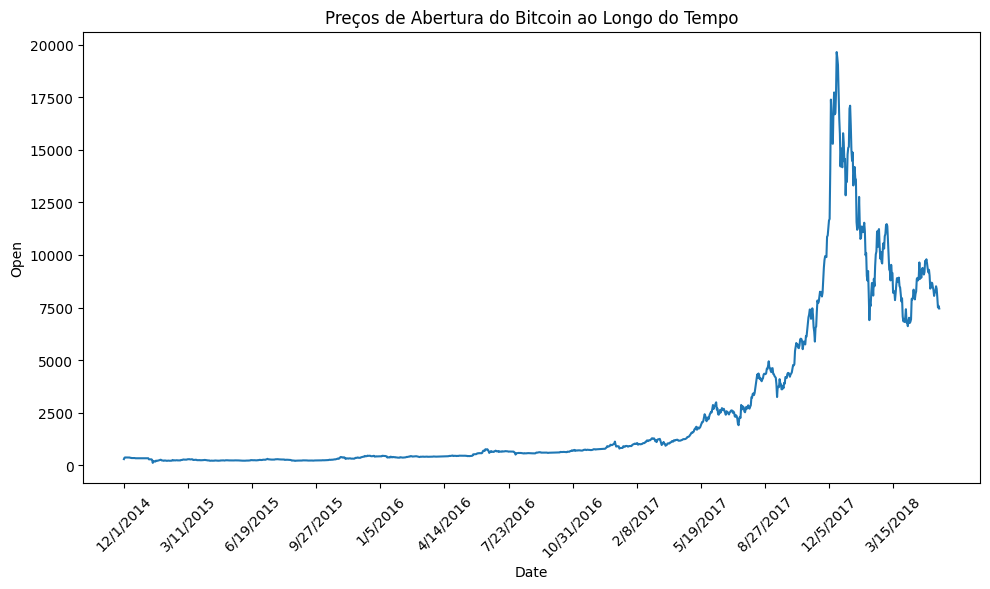

In [ ]:
# Gráfico de Linhas para Preços de Abertura ao longo do tempo
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Open', data=df)
plt.title('Preços de Abertura do Bitcoin ao Longo do Tempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.xticks(df['Date'][::100], rotation=45)
plt.show()

 ##### 🔎 Relação entre Preço de Abertura e Preço de Fechamento

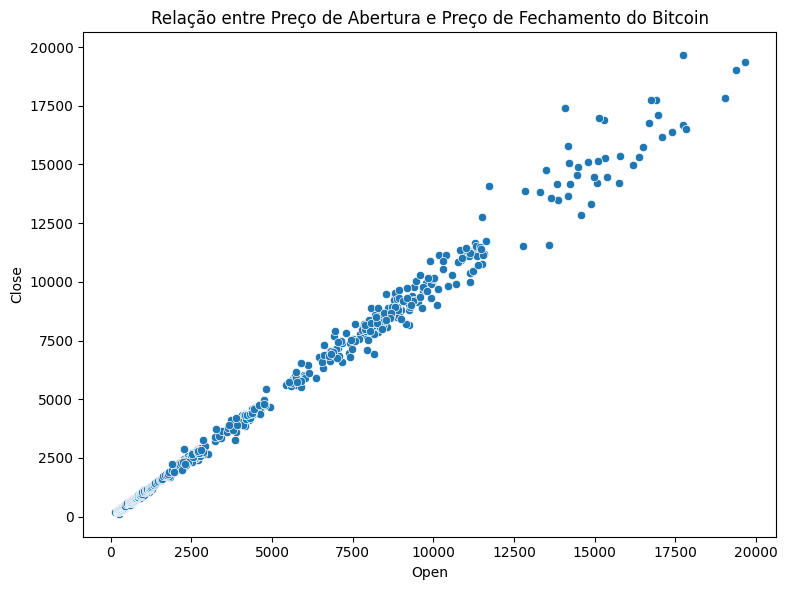

In [ ]:
# Gráfico de Dispersão (Scatter) para Relação entre Preço de Abertura e Preço de Fechamento
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Open', y='Close', data=df)
plt.title('Relação entre Preço de Abertura e Preço de Fechamento do Bitcoin')
plt.tight_layout()
plt.show()

 ##### 🔎 Distribuição dos Preços

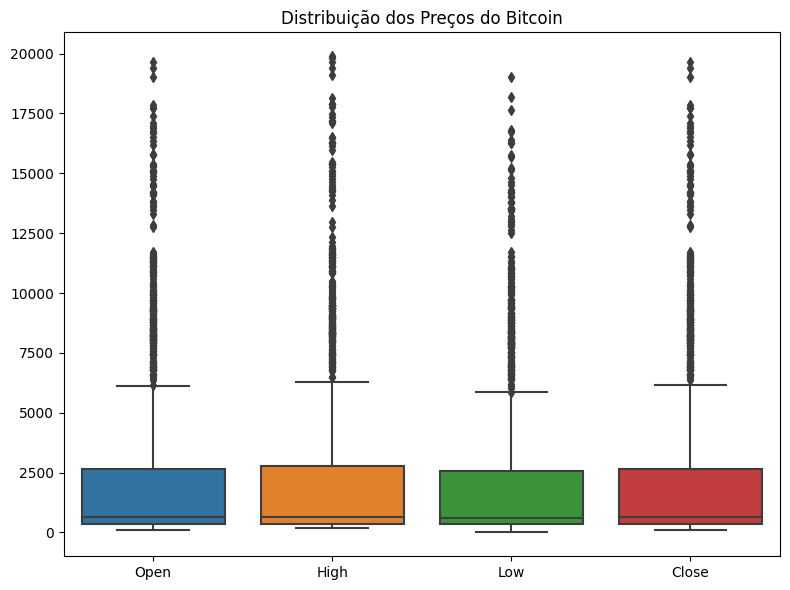

In [ ]:
# Gráfico de Boxplot para Distribuição dos Preços
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Distribuição dos Preços do Bitcoin')
plt.tight_layout()
plt.show()

##### 🔎 Comportamento Temporal do Preço do Bitcoin

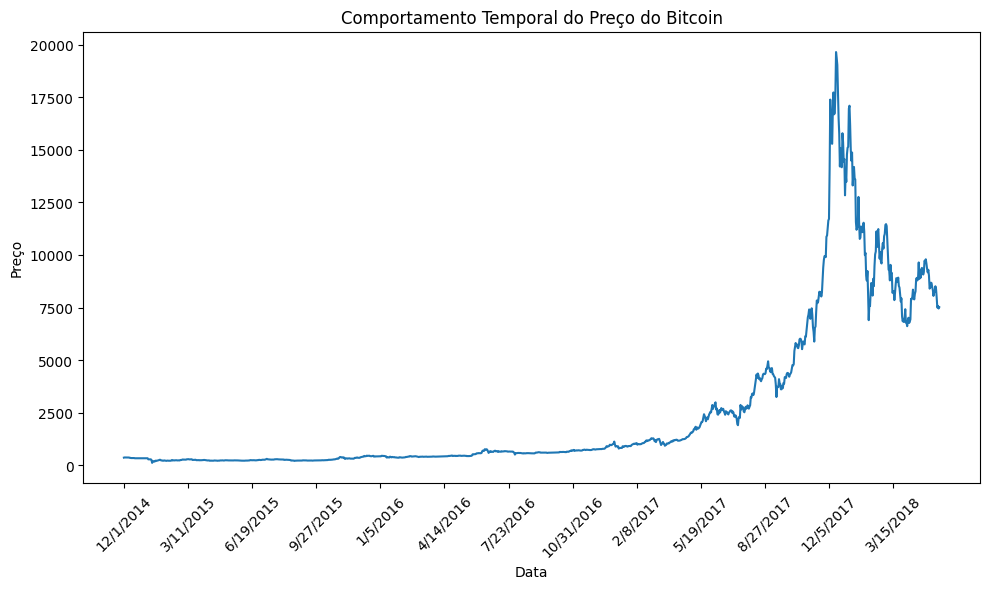

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='Close')
plt.title('Comportamento Temporal do Preço do Bitcoin')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.xticks(rotation=45)
plt.tight_layout()
plt.xticks(df['Date'][::100], rotation=45)


# Exibir o gráfico
plt.show()

#### ⚙️ Tratamento e redimensionamento:

In [ ]:
prices = df['Close']

In [ ]:
prices.head()

1272    370.0
1271    378.0
1270    378.0
1269    377.1
1268    377.1
Name: Close, dtype: float64

In [ ]:
scaler = StandardScaler()
prices_scaled = scaler.fit_transform(prices.values.reshape(-1, 1))

In [ ]:
prices_scaled

array([[-0.56356379],
       [-0.56145134],
       [-0.56145134],
       ...,
       [ 1.34137813],
       [ 1.30836052],
       [ 1.32443891]])

In [ ]:
sequence_length = 7
X = []
y = []
for i in range(len(prices_scaled) - sequence_length):
    X.append(prices_scaled[i:i+sequence_length])
    y.append(prices_scaled[i+sequence_length])
X = np.array(X)
y = np.array(y)

#### 🗂️ Dividindo entre treino e teste

In [ ]:
train_size = int(0.8 * len(X))

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
print("X_train size: {}".format(X_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(X_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (1012, 7, 1)
y_train size: (1012, 1)
X_test size: (254, 7, 1)
y_test size: (254, 1)


#### 🏋️ Treinando...

Nesse primeiro momento vamos treinar a rede em sua configuração padrão

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Avaliar o modelo
loss = model.evaluate(X_test, y_test)

# Fazer previsões
predictions = model.predict(X_test)

Epoch 1/50
32/32 [==============================] - 8s 22ms/step - loss: 0.0536
Epoch 2/50
32/32 [==============================] - 1s 24ms/step - loss: 0.0046
Epoch 3/50
32/32 [==============================] - 1s 20ms/step - loss: 0.0011
Epoch 4/50
32/32 [==============================] - 1s 24ms/step - loss: 7.3698e-04
Epoch 5/50
32/32 [==============================] - 1s 23ms/step - loss: 7.4205e-04
Epoch 6/50
32/32 [==============================] - 1s 18ms/step - loss: 7.2796e-04
Epoch 7/50
32/32 [==============================] - 0s 12ms/step - loss: 7.3166e-04
Epoch 8/50
32/32 [==============================] - 0s 10ms/step - loss: 7.4313e-04
Epoch 9/50
32/32 [==============================] - 0s 10ms/step - loss: 7.3833e-04
Epoch 10/50
32/32 [==============================] - 0s 9ms/step - loss: 7.2420e-04
Epoch 11/50
32/32 [==============================] - 0s 10ms/step - loss: 7.4288e-04
Epoch 12/50
32/32 [==============================] - 0s 10ms/step - loss: 7.4828e-04
Ep

#### 🤔 Visualizando a resposta do modelo

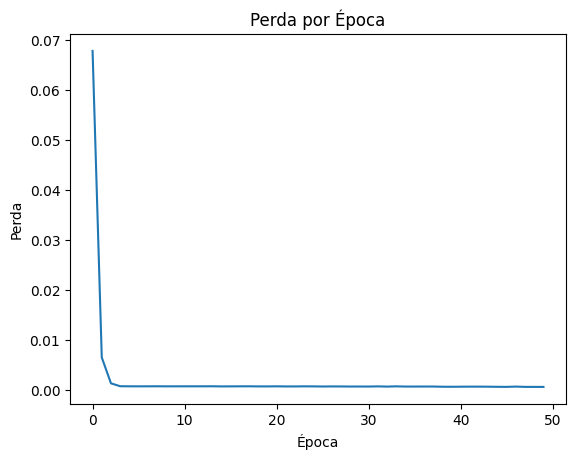

In [ ]:
plt.plot(history.history['loss'])
plt.title('Perda por Época')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.show()

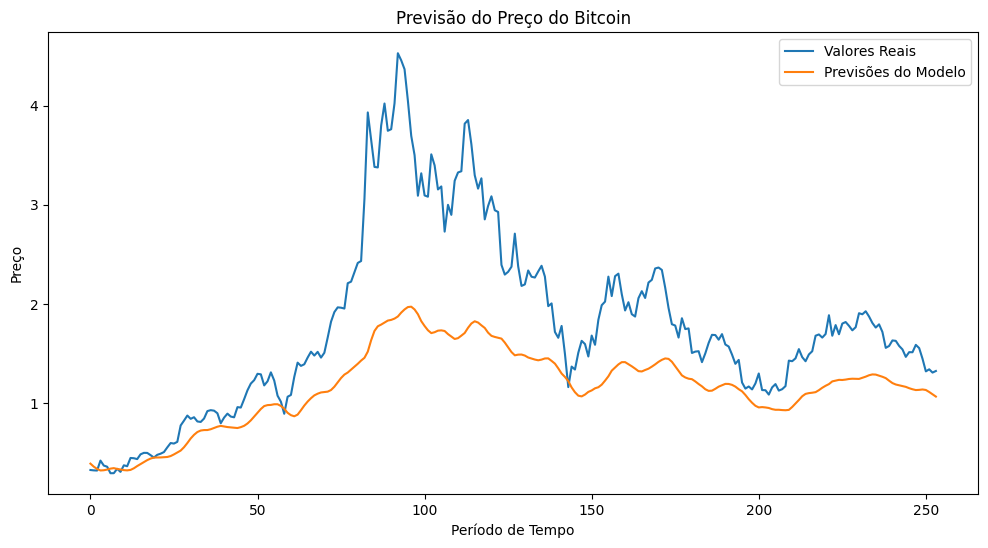

In [ ]:
# Plotar os resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Valores Reais')
plt.plot(predictions, label='Previsões do Modelo')
plt.title('Previsão do Preço do Bitcoin')
plt.xlabel('Período de Tempo')
plt.ylabel('Preço')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.2f}')

MSE: 0.69
RMSE: 0.83
MAE: 0.62
R²: 0.18


#### 🔋Melhorando o modelo (fine tuning) através do Optuna

Existem inúmeros hiperparâmetros que podem ser ajustados em modelos, e encontrar a combinação ideal deles pode ser considerado um desafio de busca. Atualmente, há diversos algoritmos de otimização disponíveis para essa tarefa  o Optuna utiliza algoritmos de busca automatizada para explorar o espaço de hiperparâmetros de forma eficiente e encontrar configurações que levam a melhores desempenhos.

- 'units':
O parâmetro 'units' se refere ao número de unidades (ou neurônios) em uma camada LSTM. Cada unidade é responsável por processar informações e aprender representações dos dados de entrada. Aumentar o número de unidades pode aumentar a capacidade da rede para aprender padrões complexos nos dados, mas também pode tornar a rede mais lenta para treinar e mais propensa a overfitting (ajuste excessivo aos dados de treinamento). Diminuir o número de unidades pode reduzir a capacidade da rede, o que pode levar a subajuste (falta de ajuste aos dados).

- 'learning_rate':
A taxa de aprendizado ('learning_rate') controla o tamanho dos passos que a rede dá ao ajustar os pesos durante o treinamento. Um valor maior de taxa de aprendizado pode fazer com que a rede aprenda mais rapidamente, mas também pode resultar em oscilações e dificuldade em convergir para uma solução. Um valor menor pode levar a um treinamento mais estável, mas pode demorar mais para convergir. A escolha da taxa de aprendizado é crucial e geralmente requer ajuste experimental.

- 'batch_size':
O tamanho do lote ('batch_size') se refere ao número de exemplos de treinamento que são usados em uma única iteração do treinamento. Um tamanho de lote maior pode acelerar o treinamento, pois permite que a GPU (ou outra unidade de processamento) processe várias amostras ao mesmo tempo. No entanto, tamanhos de lote maiores podem exigir mais memória e podem não se ajustar bem a todos os tipos de dados. Tamanhos de lote menores podem levar a um treinamento mais estável, mas também podem ser mais lentos.

- 'num_lstm_layers':
O número de camadas LSTM ('num_lstm_layers') se refere à quantidade de camadas LSTM empilhadas em sua rede. Empilhar várias camadas LSTM pode aumentar a capacidade da rede para aprender hierarquias de representação mais complexas. No entanto, adicionar muitas camadas também pode tornar o treinamento mais lento e aumentar o risco de overfitting. Aumentar o número de camadas deve ser feito com cautela e geralmente requer ajustes em outros hiperparâmetros.

- 'dense_units':
O parâmetro 'dense_units' se refere ao número de unidades (neurônios) em uma camada densa que segue a camada LSTM. Esta camada densa é frequentemente usada para produzir a saída final da rede. A quantidade de unidades nesta camada pode afetar a complexidade e a capacidade de modelagem da rede. Um aumento no número de unidades pode aumentar a capacidade da rede para capturar padrões finos, mas também pode torná-la mais suscetível a overfitting.

In [ ]:
def objective(trial):
    units = trial.suggest_int('units', 50, 150)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-1, log=True)
    batch_size = trial.suggest_int('batch_size', 16, 128)
    num_lstm_layers = trial.suggest_int('num_lstm_layers', 1, 3)
    dense_units = trial.suggest_int('dense_units', 32, 256)

    X_train_modified = X_train[:, :sequence_length]
    X_test_modified = X_test[:, :sequence_length]

    model = Sequential()
    for _ in range(num_lstm_layers):
        model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(units=units))
    model.add(Dense(units=dense_units, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

    history = model.fit(X_train_modified, y_train, epochs=50, batch_size=batch_size, verbose=0)
    mse = model.evaluate(X_test_modified, y_test, verbose=0)

    return mse

# Criar o estudo Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=15)

# Imprimir os resultados
print('Número de experimentos: ', len(study.trials))
print('Melhor valor de MSE: ', study.best_value)
print('Melhor configuração de hiperparâmetros: ', study.best_params)

[I 2023-08-11 01:04:25,125] A new study created in memory with name: no-name-1e3f9f25-088e-4416-9b81-8f3897cc58cb
[I 2023-08-11 01:05:09,095] Trial 0 finished with value: 0.6432249546051025 and parameters: {'units': 124, 'learning_rate': 2.1720957512669527e-05, 'batch_size': 58, 'num_lstm_layers': 1, 'dense_units': 167}. Best is trial 0 with value: 0.6432249546051025.
[I 2023-08-11 01:05:57,638] Trial 1 finished with value: 1.0272505283355713 and parameters: {'units': 94, 'learning_rate': 0.0002728297199919631, 'batch_size': 103, 'num_lstm_layers': 2, 'dense_units': 150}. Best is trial 0 with value: 0.6432249546051025.
[I 2023-08-11 01:06:54,224] Trial 2 finished with value: 83.74057006835938 and parameters: {'units': 54, 'learning_rate': 0.07111442130403359, 'batch_size': 51, 'num_lstm_layers': 3, 'dense_units': 217}. Best is trial 0 with value: 0.6432249546051025.
[I 2023-08-11 01:08:28,720] Trial 3 finished with value: 3.237887144088745 and parameters: {'units': 108, 'learning_rate'

Número de experimentos:  15
Melhor valor de MSE:  0.35095736384391785
Melhor configuração de hiperparâmetros:  {'units': 148, 'learning_rate': 0.0010459780654108546, 'batch_size': 19, 'num_lstm_layers': 1, 'dense_units': 197}


#### 🏋️ Treinando...

Agora vamos treinar com as melhore configurações encontradas pelo Optuna

In [ ]:
# Melhores hiperparâmetros encontrados
best_params = {
    'units': 148,
    'learning_rate': 0.0010459780654108546,
    'batch_size': 19,
    'num_lstm_layers': 1,
    'dense_units': 197
}

# Construir o modelo com os melhores hiperparâmetros
model = Sequential()
for _ in range(best_params['num_lstm_layers']):
    model.add(LSTM(units=best_params['units'], return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=best_params['units']))
model.add(Dense(units=best_params['dense_units'], activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']), loss='mean_squared_error')

# Treinar o modelo com os melhores hiperparâmetros
history = model.fit(X_train, y_train, epochs=50, batch_size=best_params['batch_size'], verbose=2)

# Avaliar o modelo no conjunto de teste
mse = model.evaluate(X_test, y_test, verbose=0)
print('MSE no conjunto de teste:', mse)

Epoch 1/50
54/54 - 6s - loss: 0.0230 - 6s/epoch - 106ms/step
Epoch 2/50
54/54 - 2s - loss: 9.4408e-04 - 2s/epoch - 38ms/step
Epoch 3/50
54/54 - 2s - loss: 7.7014e-04 - 2s/epoch - 39ms/step
Epoch 4/50
54/54 - 1s - loss: 6.6642e-04 - 1s/epoch - 23ms/step
Epoch 5/50
54/54 - 1s - loss: 8.0011e-04 - 1s/epoch - 22ms/step
Epoch 6/50
54/54 - 1s - loss: 6.1351e-04 - 1s/epoch - 23ms/step
Epoch 7/50
54/54 - 1s - loss: 6.6627e-04 - 1s/epoch - 21ms/step
Epoch 8/50
54/54 - 1s - loss: 6.1484e-04 - 1s/epoch - 21ms/step
Epoch 9/50
54/54 - 1s - loss: 6.2891e-04 - 1s/epoch - 22ms/step
Epoch 10/50
54/54 - 1s - loss: 5.7963e-04 - 1s/epoch - 21ms/step
Epoch 11/50
54/54 - 1s - loss: 6.0563e-04 - 1s/epoch - 20ms/step
Epoch 12/50
54/54 - 1s - loss: 6.0775e-04 - 1s/epoch - 27ms/step
Epoch 13/50
54/54 - 2s - loss: 6.6181e-04 - 2s/epoch - 40ms/step
Epoch 14/50
54/54 - 2s - loss: 5.6294e-04 - 2s/epoch - 32ms/step
Epoch 15/50
54/54 - 1s - loss: 5.8609e-04 - 1s/epoch - 21ms/step
Epoch 16/50
54/54 - 1s - loss: 5.7092

#### 🤔 Visualizando a resposta do modelo

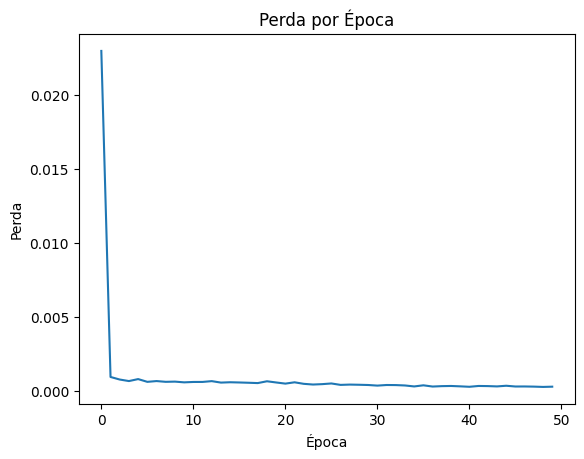

In [ ]:
plt.plot(history.history['loss'])
plt.title('Perda por Época')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.show()

In [ ]:
predictions = model.predict(X_test)
#predictions = scaler.inverse_transform(predictions)

8/8 [==============================] - 1s 10ms/step


In [ ]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.2f}')

MSE: 0.33
RMSE: 0.58
MAE: 0.44
R²: 0.60


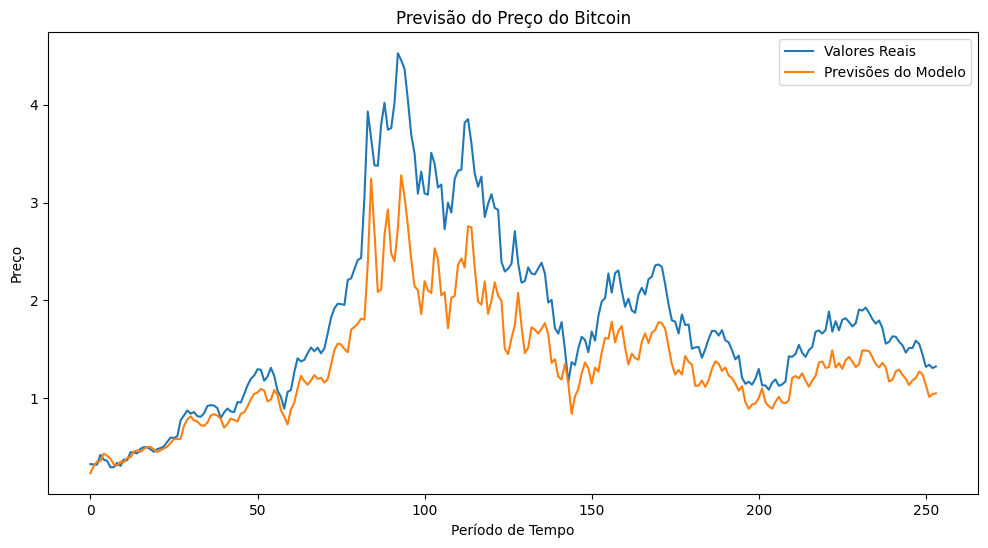

In [ ]:
# Plotar os resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Valores Reais')
plt.plot(predictions, label='Previsões do Modelo')
plt.title('Previsão do Preço do Bitcoin')
plt.xlabel('Período de Tempo')
plt.ylabel('Preço')
plt.legend()
plt.show()

#### 💬 Testando com outras variáveis ('Open', 'High', 'Low', 'Close')

In [ ]:
# Selecionar as colunas relevantes
data = df[['Open', 'High', 'Low', 'Close']].values

# Tamanho da janela (janela deslizante)
window_size = 7

# Criar sequências de dados
X = []
y = []
for i in range(len(data) - window_size):
    X.append(data[i:i+window_size])
    y.append(data[i+window_size, 3])  # Usamos 'Close' como alvo

X = np.array(X)
y = np.array(y)

# Divisão dos dados em treino e teste (proporção 80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Normalização dos dados após a divisão
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 4)).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, 4)).reshape(X_test.shape)
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1)).reshape(-1)
y_test_scaled = scaler.transform(y_test.reshape(-1, 1)).reshape(-1)

# Definir o modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
history = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_scaled), verbose=1)

# Fazer previsões
predictions_scaled = model.predict(X_test_scaled)

# Inverter a normalização das previsões e dos valores reais
# predictions = scaler.inverse_transform(predictions_scaled)
# y_test_original = scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).reshape(-1)

Epoch 1/50
32/32 [==============================] - 7s 39ms/step - loss: 0.0064 - val_loss: 0.1914
Epoch 2/50
32/32 [==============================] - 0s 11ms/step - loss: 5.6779e-04 - val_loss: 0.4176
Epoch 3/50
32/32 [==============================] - 1s 17ms/step - loss: 4.7583e-04 - val_loss: 0.4330
Epoch 4/50
32/32 [==============================] - 1s 26ms/step - loss: 4.5248e-04 - val_loss: 0.4320
Epoch 5/50
32/32 [==============================] - 1s 28ms/step - loss: 4.7921e-04 - val_loss: 0.4481
Epoch 6/50
32/32 [==============================] - 1s 33ms/step - loss: 5.6156e-04 - val_loss: 0.4995
Epoch 7/50
32/32 [==============================] - 2s 57ms/step - loss: 4.5514e-04 - val_loss: 0.4179
Epoch 8/50
32/32 [==============================] - 0s 14ms/step - loss: 5.0850e-04 - val_loss: 0.4125
Epoch 9/50
32/32 [==============================] - 0s 13ms/step - loss: 4.9124e-04 - val_loss: 0.4079
Epoch 10/50
32/32 [==============================] - 0s 11ms/step - loss: 4.3

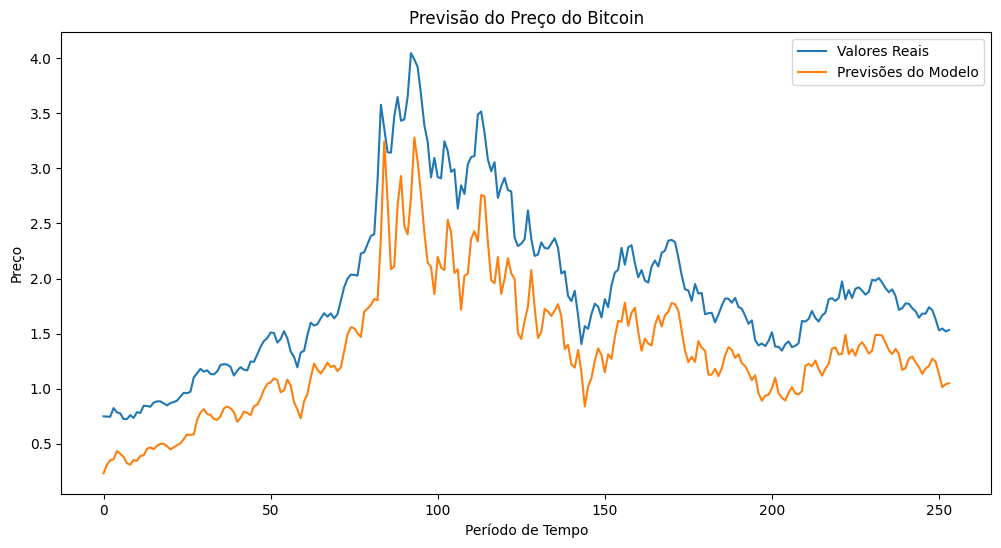

In [ ]:
# Plotar os resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test_scaled, label='Valores Reais')
plt.plot(predictions, label='Previsões do Modelo')
plt.title('Previsão do Preço do Bitcoin')
plt.xlabel('Período de Tempo')
plt.ylabel('Preço')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y_test_scaled, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled, predictions)
r2 = r2_score(y_test_scaled, predictions)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.2f}')

MSE: 0.34
RMSE: 0.59
MAE: 0.55
R²: 0.34
